# Maskinlæring kalvelykke ku masteroppgave 2021

## Knut-Henning Kofoed | Februar 2021

### Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

### Hele datasettet

Datasettet inneholder 4 aktivitets klasser: Hviler = 0, Bevegelse = 1, Beiter = 2, Dier = 3

#### Utforske data

In [3]:
# Innlasting av data
df = pd.read_csv('aks_atf_KOBLET.csv', header=0)
print('Shape of data: {}'.format(df.shape))
df.head(5)

Shape of data: (578976, 13)


,serial,date,header_date,index,x,y,z,xcal,ycal,zcal,norm,kalv,aktivitet
0,37383,2020-06-18 08:14:53.639,2020-06-18T08:07:07,0,2816,15616,1024,0.176,0.976,0.064,0.993805,True,0
1,37383,2020-06-18 08:14:53.639,2020-06-18T08:07:07,1,2816,15872,768,0.176,0.992,0.048,1.008635,True,0
2,37383,2020-06-18 08:14:53.639,2020-06-18T08:07:07,2,3072,15616,768,0.192,0.976,0.048,0.995863,True,0
3,37383,2020-06-18 08:14:53.639,2020-06-18T08:07:07,3,2560,15872,512,0.160,0.992,0.032,1.005330,True,0
4,37383,2020-06-18 08:14:53.639,2020-06-18T08:07:07,4,2560,15616,256,0.160,0.976,0.016,0.989157,True,0


In [4]:
df.describe()

,serial,index,x,y,z,xcal,ycal,zcal,norm,aktivitet
count,578976.000000,578976.000000,578976.000000,578976.000000,578976.000000,578976.000000,578976.000000,578976.000000,578976.000000,578976.000000
mean,37436.310617,15.500000,228.855358,15775.088266,-1436.269939,0.014303,0.985943,-0.089767,1.027856,0.747306
std,669.714812,9.233101,2429.988354,2627.263979,3564.727227,0.151874,0.164204,0.222795,0.153381,1.010712
min,35396.000000,0.000000,-32768.000000,-32768.000000,-32768.000000,-2.048000,-2.048000,-2.048000,0.045255,0.000000
25%,37383.000000,7.750000,-512.000000,14848.000000,-2560.000000,-0.032000,0.928000,-0.160000,0.970344,0.000000
50%,37684.000000,15.500000,512.000000,15872.000000,-768.000000,0.032000,0.992000,-0.048000,1.011296,0.000000
75%,37809.000000,23.250000,1280.000000,16640.000000,512.000000,0.080000,1.040000,0.032000,1.068412,2.000000
max,37809.000000,31.000000,32512.000000,32512.000000,32512.000000,2.032000,2.032000,2.032000,3.547240,3.000000


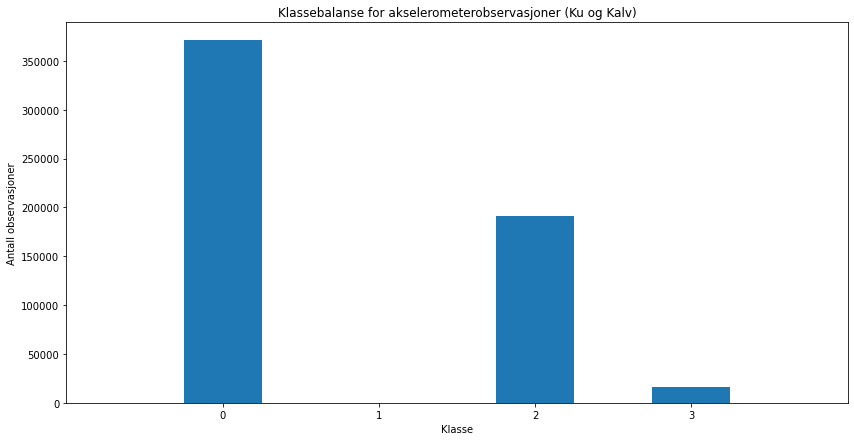

In [5]:
# Klassebalanse for aktivitet (Ku og Kalv)
data = df['aktivitet']
counts = np.bincount(data)
n_classes = len(counts)

fig, ax = plt.subplots(figsize=(14,7))
ax.bar(range(n_classes), counts, width=0.5, align='center')
ax.set(xticks=range(n_classes), xlim=[-1, n_classes])
ax.set_xlabel('Klasse')
ax.set_ylabel('Antall observasjoner')
ax.set_title('Klassebalanse for akselerometerobservasjoner (Ku og Kalv)')

plt.show()

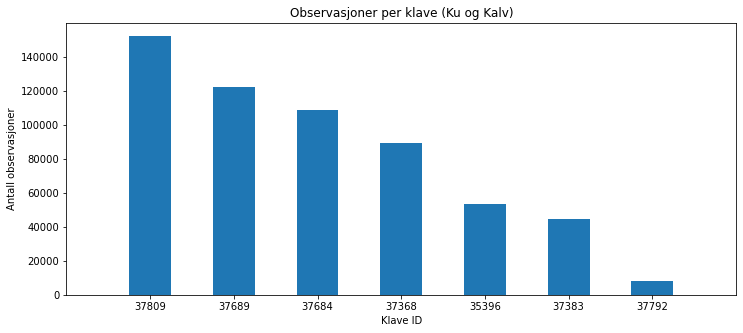

In [6]:
# Observasjoner pr klave (Ku og Kalv)
df_counts = df['serial'].value_counts()
num_coll = len(df_counts) # Antall klaver i settet

fig, ax = plt.subplots(figsize=(12,5))
ax.bar(range(num_coll), df_counts, width=0.5, align='center')
ax.set(xticks=range(num_coll), xlim=[-1, num_coll])
ax.set_xticklabels(df_counts.index)
ax.set_xlabel('Klave ID')
ax.set_ylabel('Antall observasjoner')
ax.set_title('Observasjoner per klave (Ku og Kalv)')

plt.show()

### Ku

#### Utforske data

In [7]:
df_ku = df.loc[df['kalv'] == False]
print('Shape of data: {}'.format(df_ku.shape))

Shape of data: (391552, 13)


In [8]:
df_ku.describe()

,serial,index,x,y,z,xcal,ycal,zcal,norm,aktivitet
count,391552.000000,391552.000000,391552.000000,391552.000000,391552.000000,391552.000000,391552.000000,391552.000000,391552.000000,391552.000000
mean,37736.445897,15.500000,-93.225891,15942.300098,-550.879372,-0.005827,0.996394,-0.034430,1.025185,0.516182
std,59.830106,9.233104,2466.766320,2705.315314,2780.611021,0.154173,0.169082,0.173788,0.159924,0.875170
min,37684.000000,0.000000,-32768.000000,-32768.000000,-32768.000000,-2.048000,-2.048000,-2.048000,0.045255,0.000000
25%,37684.000000,7.750000,-768.000000,15104.000000,-1792.000000,-0.048000,0.944000,-0.112000,0.965451,0.000000
50%,37689.000000,15.500000,256.000000,16128.000000,-512.000000,0.016000,1.008000,-0.032000,1.010536,0.000000
75%,37809.000000,23.250000,1024.000000,16896.000000,768.000000,0.064000,1.056000,0.048000,1.072119,2.000000
max,37809.000000,31.000000,32512.000000,32512.000000,32512.000000,2.032000,2.032000,2.032000,3.547240,2.000000


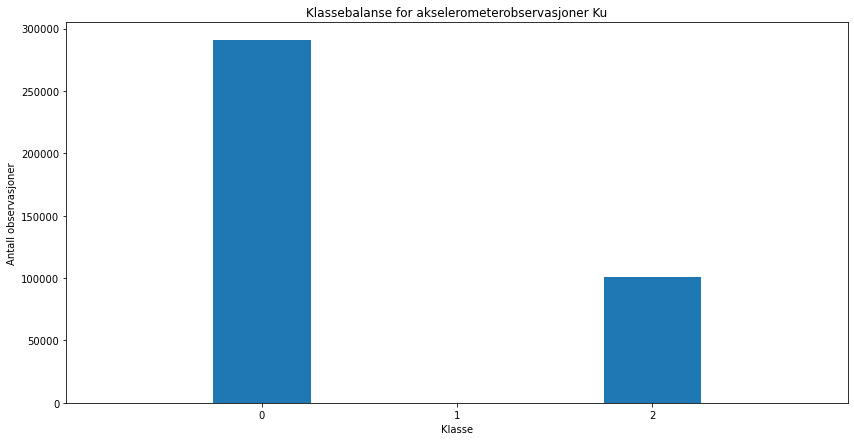

In [9]:
# Klassebalanse for aktivitet (Ku)
data = df_ku['aktivitet']
counts = np.bincount(data)
n_classes = len(counts)

fig, ax = plt.subplots(figsize=(14,7))
ax.bar(range(n_classes), counts, width=0.5, align='center')
ax.set(xticks=range(n_classes), xlim=[-1, n_classes])
ax.set_xlabel('Klasse')
ax.set_ylabel('Antall observasjoner')
ax.set_title('Klassebalanse for akselerometerobservasjoner Ku')

plt.show()

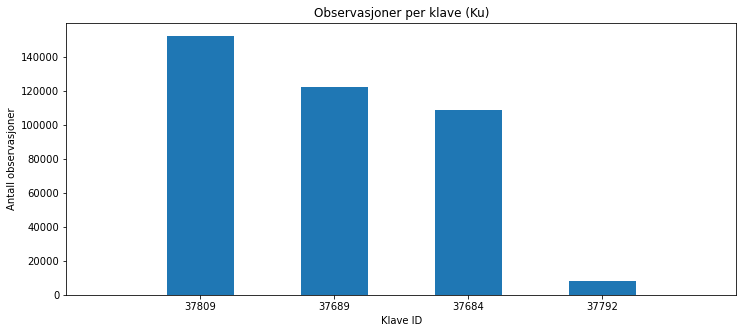

In [10]:
# Observasjoner pr klave (Ku)
df_counts = df_ku['serial'].value_counts()
num_coll = len(df_counts) # Antall klaver i settet

fig, ax = plt.subplots(figsize=(12,5))
ax.bar(range(num_coll), df_counts, width=0.5, align='center')
ax.set(xticks=range(num_coll), xlim=[-1, num_coll])
ax.set_xticklabels(df_counts.index)
ax.set_xlabel('Klave ID')
ax.set_ylabel('Antall observasjoner')
ax.set_title('Observasjoner per klave (Ku)')

plt.show()

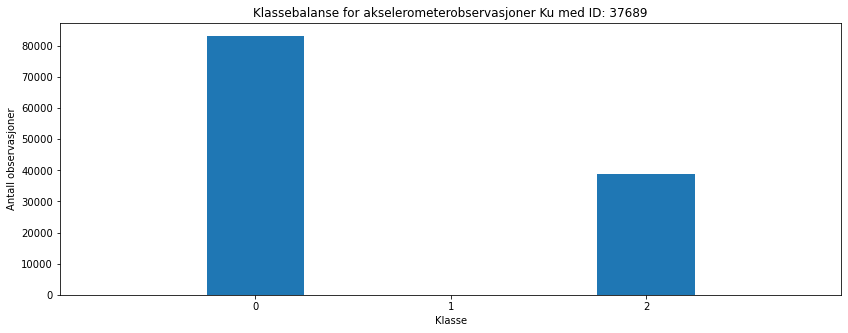

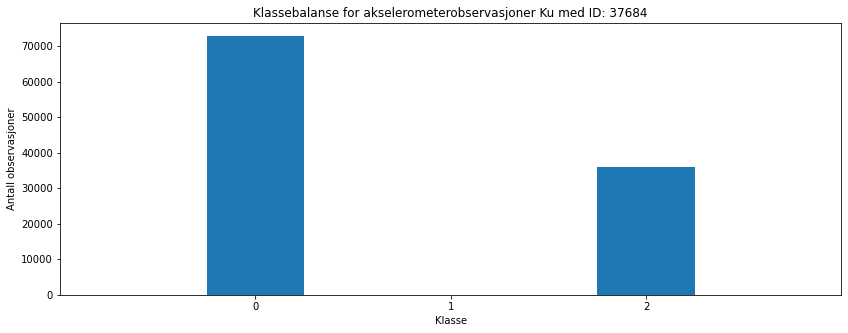

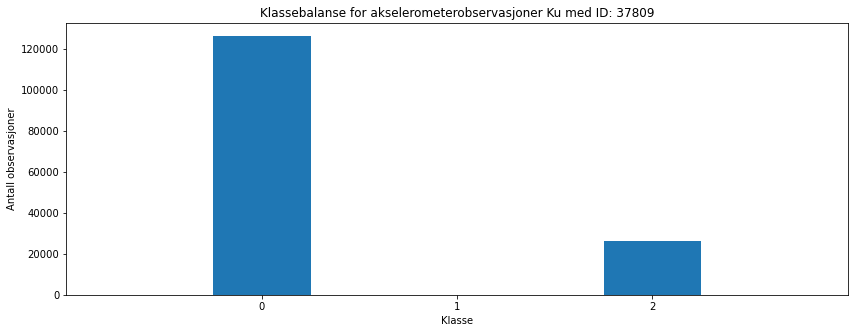

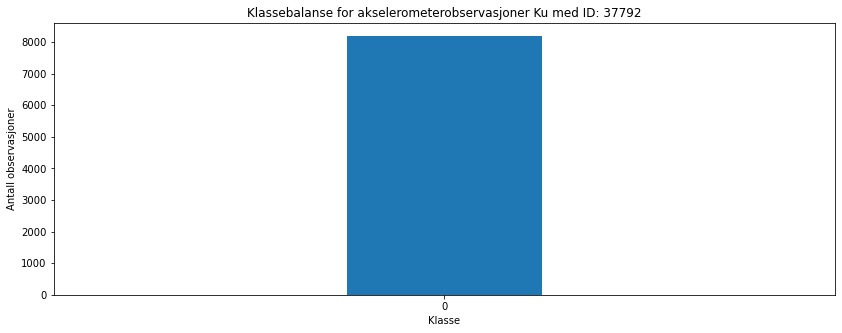

In [11]:
# Klassebalanse for for hver klave (Ku)
serials = list(df_ku['serial'].unique())

for serial in serials:
    data = df_ku['aktivitet'][df_ku['serial'] == serial] 
    counts = np.bincount(data)
    n_classes = len(counts)

    fig, ax = plt.subplots(figsize=(14,5))
    ax.bar(range(n_classes), counts, width=0.5, align='center')
    ax.set(xticks=range(n_classes), xlim=[-1, n_classes])
    ax.set_xlabel('Klasse')
    ax.set_ylabel('Antall observasjoner')
    ax.set_title('Klassebalanse for akselerometerobservasjoner Ku med ID: {}'.format(serial))

    plt.show()

#### Maskinlæring

Import

In [12]:
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix
from scipy import stats

Dataklargjøring

In [13]:
attributes = ['xcal', 'ycal', 'zcal', 'norm']
df_ku['aktivitet'].replace({2: 1}, inplace=True)

df_train = df_ku[(df_ku['serial'] == 37689)]
df_train = df_train.head(100000)
df_test = df_ku[df_ku['serial'] == 37684]

input_train = df_train[attributes]
y_train = df_train['aktivitet']

input_test = df_test[attributes]
y_test = df_test['aktivitet']

C:\Users\knut-\Anaconda3\lib\site-packages\pandas\core\series.py:4512: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [14]:
scale_columns = attributes

scaler = StandardScaler()

scaler = scaler.fit(input_train[scale_columns])

input_train.loc[:, scale_columns] = scaler.transform(input_train[scale_columns].to_numpy())
input_test.loc[:, scale_columns] = scaler.transform(input_test[scale_columns].to_numpy())

C:\Users\knut-\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\knut-\Anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
C:\Users\knut-\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

In [15]:
def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

In [16]:
print(input_train.shape, y_train.shape)

(100000, 4) (100000,)


In [17]:
TIME_STEPS = 124
STEP = 62

input_train, y_train = create_dataset(
    input_train[attributes],
    y_train,
    TIME_STEPS,
    STEP
)

input_test, y_test = create_dataset(
    input_test[attributes],
    y_test,
    TIME_STEPS,
    STEP
)

In [18]:
print(input_train.shape, y_train.shape)

(1611, 124, 4) (1611, 1)


In [19]:
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

enc = enc.fit(y_train)

y_train = enc.transform(y_train)
y_test = enc.transform(y_test)

In [20]:
print(input_train.shape, y_train.shape)

(1611, 124, 4) (1611, 2)


GRU:

In [21]:
model = tf.keras.Sequential()
model.add(
    tf.keras.layers.Conv1D(
        filters=100, 
        kernel_size=3,
        activation='relu',
        input_shape=[input_train.shape[1], input_train.shape[2]]
    )
)
model.add(tf.keras.layers.MaxPooling1D(pool_size=4, padding='valid'))
model.add(tf.keras.layers.BatchNormalization())
model.add(
    tf.keras.layers.Conv1D(
        filters=100, 
        kernel_size=3,
        activation='relu'
    )
)
model.add(tf.keras.layers.MaxPooling1D(pool_size=2, padding='valid'))
model.add(tf.keras.layers.BatchNormalization())
model.add(
    tf.keras.layers.GRU(
        units=128,
        activation='tanh',
        recurrent_activation='sigmoid',
        use_bias=True,
        kernel_initializer='glorot_uniform',
        return_sequences=True,  # neste lag er også GRU
        dropout=0.0,
        recurrent_dropout=0.0
    )
)
model.add(
    tf.keras.layers.GRU(
        units=128,
        activation='tanh',
        recurrent_activation='sigmoid',
        use_bias=True,
        kernel_initializer='glorot_uniform',
        return_sequences=False,  # neste lag er Dense
        dropout=0.2,
        recurrent_dropout=0.2
    )
)

model.add(tf.keras.layers.Dropout(rate=0.1))

model.add(tf.keras.layers.Dense(y_train.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['acc'])

In [22]:
history = model.fit(
    input_train, y_train,
    epochs=2,
    batch_size=128,
    validation_split=0.1,
    shuffle=False
)

Epoch 1/2
12/12 [==============================] - 2s 169ms/step - loss: 0.7355 - acc: 0.5735 - val_loss: 0.5697 - val_acc: 0.6049
Epoch 2/2
12/12 [==============================] - 1s 89ms/step - loss: 0.5163 - acc: 0.7978 - val_loss: 0.3887 - val_acc: 0.9259


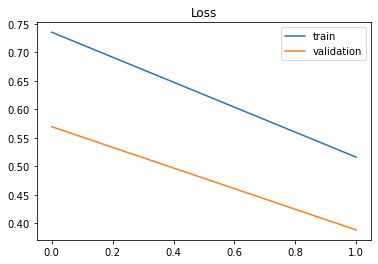

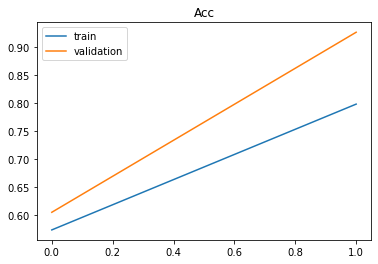

In [23]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss')
plt.legend();
plt.show()

plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.title('Acc')
plt.legend();
plt.show()

In [24]:
model.evaluate(input_test, y_test)

55/55 [==============================] - 0s 9ms/step - loss: 0.6437 - acc: 0.6746


[0.6436617374420166, 0.674643874168396]

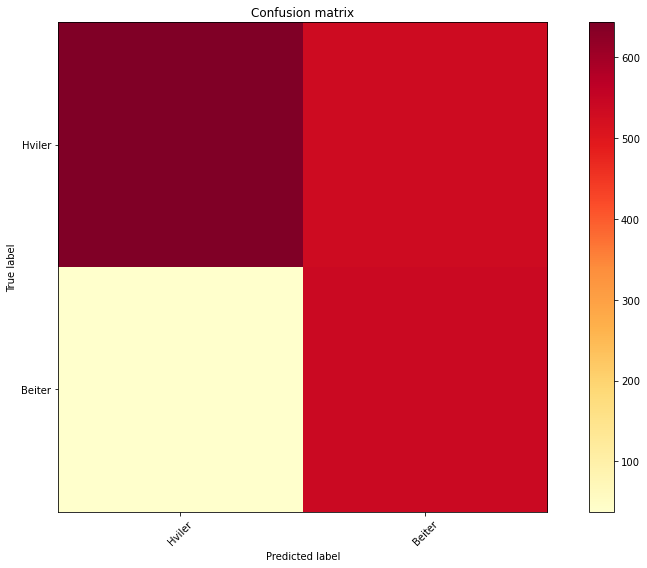

In [25]:
Y_test = np.argmax(y_test, axis=1) # Konverterer fra Onehot tilbake til klasse
y_pred = np.argmax(model.predict(input_test), axis=-1)
classes = ['Hviler', 'Beiter']

plt.figure(figsize=(12,8))
plt.imshow(confusion_matrix(Y_test, y_pred), interpolation='nearest', cmap='YlOrRd')
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout();

LSTM:

In [26]:
model = tf.keras.Sequential()
model.add(
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(
            dropout=0.2,
            units=128, 
            input_shape=[input_train.shape[1], input_train.shape[2]],
            return_sequences=True
        )
    )
)
model.add(
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(
            dropout=0.2,
            units=128,
            return_sequences=False
        )
    )
)

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=5, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(y_train.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['acc'])

In [27]:
history = model.fit(
    input_train, y_train,
    epochs=2,
    batch_size=128,
    validation_split=0.1,
    shuffle=False
)

Epoch 1/2
12/12 [==============================] - 15s 1s/step - loss: 0.6789 - acc: 0.8081 - val_loss: 0.4034 - val_acc: 0.9506
Epoch 2/2
12/12 [==============================] - 15s 1s/step - loss: 0.2294 - acc: 0.9476 - val_loss: 0.3026 - val_acc: 0.9136


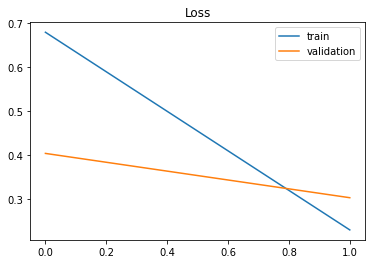

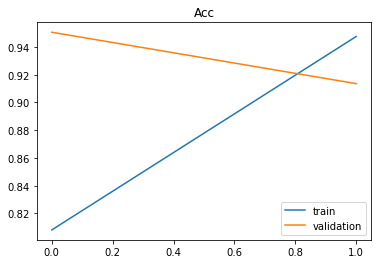

In [28]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss')
plt.legend();
plt.show()

plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.title('Acc')
plt.legend();
plt.show()

In [29]:
model.evaluate(input_test, y_test)

55/55 [==============================] - 5s 98ms/step - loss: 1.4594 - acc: 0.6450


[1.45939040184021, 0.645014226436615]

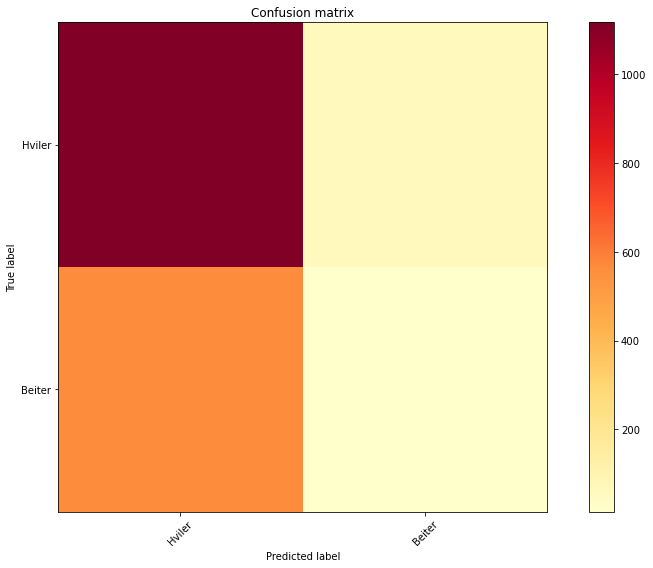

In [30]:
Y_test = np.argmax(y_test, axis=1) # Konverterer fra Onehot tilbake til klasse
y_pred = np.argmax(model.predict(input_test), axis=-1)
classes = ['Hviler', 'Beiter']

plt.figure(figsize=(12,8))
plt.imshow(confusion_matrix(Y_test, y_pred), interpolation='nearest', cmap='YlOrRd')
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout();